In [1]:
import sys
sys.path.append("../code/")

from matplotlib import pyplot as plt

In [2]:
from cv.preprocess import convert_pdf_to_jpg

pdf_path = "sample.pdf"

images = convert_pdf_to_jpg(pdf_path, 
                   output_dir=None,
                   first_page_only=False, 
                   dpi=200, n_thread=4)

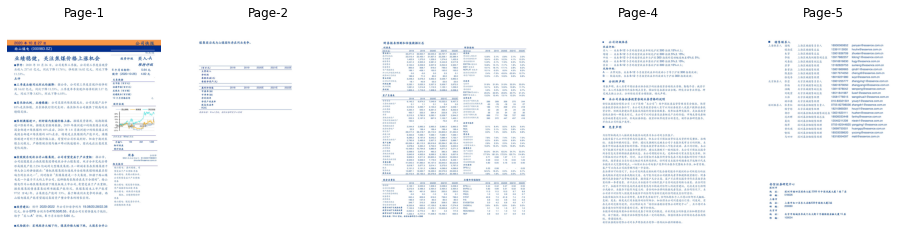

In [3]:
n = len(images)

plt.figure(figsize=(16, 4))
for i,x in enumerate(images):
    plt.subplot(1, n, (i+1))
    plt.imshow(x)
    plt.title(f"Page-{i+1}")
    plt.axis('off')

plt.show()

In [4]:
from cv.layout_parser import *

with open("../code/config.yaml") as f:
        config = yaml.load(f, Loader=yaml.FullLoader)

hlp_conf = config["LAYOUT"]["HarvardLP"]
dataset = "Prima"
modelname = hlp_conf["OpenModels"][dataset][0]
score_thresh = 0.2
parser = HarvardLayoutParser(dataset,
                             model_path=os.path.join(config["ROOT"], hlp_conf["ModelDir"], modelname + ".pth"),
                             config_path=os.path.join(config["ROOT"], hlp_conf["ModelDir"], modelname + ".yml"),
                             score_thresh=score_thresh)

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [5]:
import numpy as np
im = np.array(images[0])

text_bbxes = parser.detect(im, keep_text_only=True, dump_to_tuples=True)

print(f"Found {len(text_bbxes)} text regions.")

/Users/fan/opt/anaconda3/envs/layout/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


Found 19 text regions.


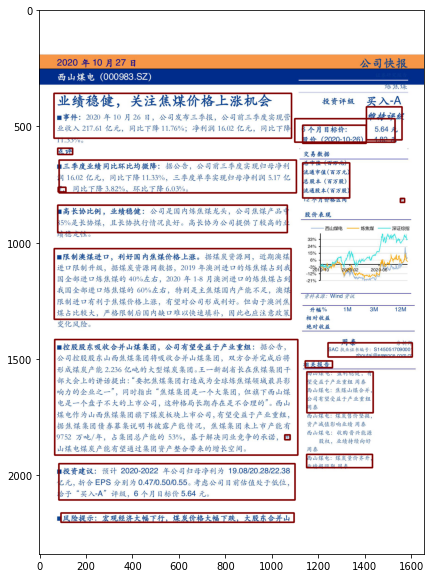

In [6]:
parser.show_bbxes_on(im, text_bbxes, show=False)

plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()